In [16]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [9]:
train_2016 = pd.read_csv('input/train_2016_v2.csv', index_col='transactiondate', parse_dates = ['transactiondate'])
print train_2016.info()
train_2016.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90275 entries, 2016-01-01 to 2016-12-30
Data columns (total 2 columns):
parcelid    90275 non-null int64
logerror    90275 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 MB
None


,parcelid,logerror
transactiondate,,
2016-01-01,11016594,0.0276
2016-01-01,14366692,-0.1684
2016-01-01,12098116,-0.0040
2016-01-02,12643413,0.0218
2016-01-02,14432541,-0.0050


/Users/yezhou/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


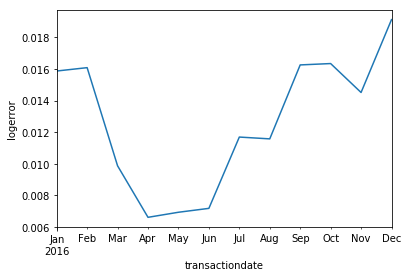

In [17]:
train_2016['logerror'].resample('M').plot()
plt.ylabel('logerror')
plt.show()

In [32]:
properties_2016 = pd.read_csv('input/properties_2016.csv')
print properties_2016.info()
properties_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [18]:
nrow = properties_2016.shape[0]
nans = properties_2016.isnull().sum() / nrow
print nans

parcelid                        0.000000
airconditioningtypeid           0.728154
architecturalstyletypeid        0.997970
basementsqft                    0.999455
bathroomcnt                     0.003840
bedroomcnt                      0.003836
buildingclasstypeid             0.995769
buildingqualitytypeid           0.350637
calculatedbathnbr               0.043183
decktypeid                      0.994273
finishedfloor1squarefeet        0.932093
calculatedfinishedsquarefeet    0.018613
finishedsquarefeet12            0.092467
finishedsquarefeet13            0.997430
finishedsquarefeet15            0.936086
finishedsquarefeet50            0.932093
finishedsquarefeet6             0.992630
fips                            0.003831
fireplacecnt                    0.895272
fullbathcnt                     0.043183
garagecarcnt                    0.704120
garagetotalsqft                 0.704120
hashottuborspa                  0.976881
heatingorsystemtypeid           0.394885
latitude        

In [129]:
nrow = properties_2016.shape[0]
nans = properties_2016.isnull().sum() / nrow 

In [135]:
print nans[(nairconditioningtypeidans<0.5)&(nans>0)].index.tolist()

['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedsquarefeet12', 'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock']


In [109]:
train_2016 = pd.read_csv('input/train_2016_v2.csv')
print train_2016.info()
train_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB
None


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [110]:
data = pd.concat([train_2016, properties_2016], axis=1)

In [117]:
train = data[~data['logerror'].isnull()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
parcelid                        90275 non-null float64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
parcelid                        90275 non-null int64
airconditioningtypeid           90275 non-null float64
architecturalstyletypeid        90275 non-null float64
basementsqft                    90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               86420 non-null float64
decktypeid                      90275 non-null float64
finishedfloor1squarefeet        90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
finishedsquarefeet12            82353 non-null float64
finishedsquare

In [120]:
test = data[data['logerror'].isnull()]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894942 entries, 90275 to 2985216
Data columns (total 61 columns):
parcelid                        float64
logerror                        float64
transactiondate                 object
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullba

[]

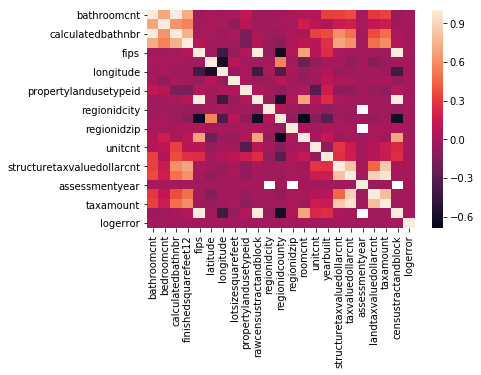

In [139]:
sns.heatmap(train[nans[(nans<0.5)&(nans>0)].index.tolist() + ['logerror']].corr())
plt.plot()

In [152]:
target = train['logerror']
features = train.drop(['logerror', 'parcelid', 'transactiondate', 
                       'fields hashottuborspa', 'propertycountylandusecode',
                       'propertyzoningdesc', 'taxdelinquencyflag',
                      'hashottuborspa'], axis = 1)

In [147]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 57 columns):
airconditioningtypeid           90275 non-null float64
architecturalstyletypeid        90275 non-null float64
basementsqft                    90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             90275 non-null float64
buildingqualitytypeid           90275 non-null float64
calculatedbathnbr               86420 non-null float64
decktypeid                      90275 non-null float64
finishedfloor1squarefeet        90275 non-null float64
calculatedfinishedsquarefeet    90275 non-null float64
finishedsquarefeet12            82353 non-null float64
finishedsquarefeet13            249 non-null float64
finishedsquarefeet15            5648 non-null float64
finishedsquarefeet50            6923 non-null float64
finishedsquarefeet6             658 non-null float64
fips             

In [148]:
import xgboost
model = xgboost.XGBClassifier()

In [ ]:
model.fit(features, target)

In [142]:
model.variable_importance_

AttributeError: 'XGBClassifier' object has no attribute 'variable_importance'